# Results obtained using various solvers for the Vehicle Routing Problem
The `cost` acts as a parameter of comparison between different solvers. In this project it is the total sum of distances of the routes by each vehicle.
The approximation ratio is the ratio of the cost of the obtained from the solver to that of the best known solution. The closer it is to 1, the better the solver is.

By default the `LeapHybridCQMSampler` lets the solver run for around **5 seconds**. For better results this can be increased by passing a parameter `time_limit` into the solver's `.solve()` method. However, one needs to be careful about it as running it for too long may exhaust the limit of resources that D-Wave provides.

In [1]:
import numpy as np

class Initializer:

    def __init__(self, n, a, b):
        self.n = n
        self.a = a
        self.b = b

    def generate_nodes_and_weight_matrix(self):

        n = self.n
        a = self.a
        b = self.b
        
        np.random.seed(100*a + b)

        x = (np.random.rand(n) - 0.5) * 50
        y = (np.random.rand(n) - 0.5) * 50

        weight_matrix = np.zeros([n, n])
        for i in range(n):
            for j in range(i+1, n):
                weight_matrix[i, j] = (x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2
                weight_matrix[j, i] = weight_matrix[i, j]

        return x, y, weight_matrix

In [2]:
from utils import VRPSolver, compare_solvers, random_routing_instance

n=10     # number of clients
m=3     # number of vehicles

initializer = Initializer(n+1, n+1, 3)
xc, yc, cost = initializer.generate_nodes_and_weight_matrix()

In [3]:
### Select the type of model to solve VRP
#    1: Constrained Quadratic Model - A new model released by D-Wave Systems capable of encoding Quadratically Constrained Quadratic Programs (QCQPs)
#    2: Binary Quadratic Model - A model that encodes Ising or QUBO problems
model = 'CQM'


### The time limit (in seconds) for the solvers to run on the `LeapHybridCQMSampler` backend
time_limit = 25


### Select solver
#    1: RAS (Route Activation Solver)
#    2: FQS (Full QUBO Solver)
#    3: GPS (Guillermo, Parfait, Saúl) (only using CQM)
#    4: DBSCANS (Density-Based Spatial Clustering of Applications with Noise - Solver)
#    5: SPS (Solution Partition Solver)
solver = 'fqs'

In [4]:
vrps = VRPSolver(n, m, cost, xc, yc, model=model, solver=solver, time_limit=time_limit)
vrps.solve_vrp()


FULL QUBO SOLVER (Constrained Quadratic Model)
7 feasible solutions of 35.
Minimum total cost: 5399.969725142379 ____(X)
Minimum total cost: 7097.597752649794
Number of variables: 429
Runtime: 24992.293 ms


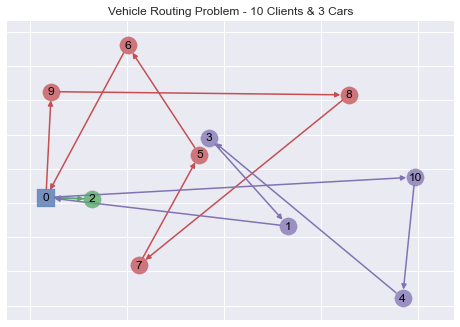

In [5]:
vrps.plot_solution()

In [6]:
# Number of iterations to get the average approximation ratio for a particular solver
# Warning! More iterations will take more time and resources to run
n_iter = 1

In [7]:
comparison_table = compare_solvers(n, m, cost, xc, yc, n_iter=n_iter, time_limit=time_limit)


EXACT (CLASSICAL) SOLVER
Minimum cost: 2510.6938880123944
Time taken to solve: 404.192 ms

ROUTE ACTIVATION SOLVER (Constrained Quadratic Model)
26 feasible solutions of 51.
Minimum total cost: 4942.760053612643
Number of variables: 150
Runtime: 25501.136 ms

FULL QUBO SOLVER (Constrained Quadratic Model)
No feasible solutions.
Number of variables: 429
Runtime: 24951.941 ms

GUILLERMO, PARFAIT, SAÚL SOLVER (Constrained Quadratic Model)
No feasible solutions.
Number of variables: 1080
Runtime: 25010.818 ms


In [8]:
print('Minimum cost of best known solution:', comparison_table[0]['exact_min_cost'])
for solver_id in comparison_table[1]:
  print(f'{solver_id}:', '\t', f'average min cost = {comparison_table[1][solver_id]["avg_min_cost"]}',
                         '\t', f'average runtime = {comparison_table[1][solver_id]["avg_runtime"]}',
                         '\t', f'number of variables = {comparison_table[1][solver_id]["num_vars"]}',
                         '\t', f'approximation ratio = {comparison_table[1][solver_id]["approximation_ratio"]}'
  )

Minimum cost of best known solution: 2510.6938880123944
RAS: 	 average min cost = 4942.760053612643 	 average runtime = 25501.136 	 number of variables = 150 	 approximation ratio = 1.9686828717799636
FQS: 	 average min cost = None 	 average runtime = 24951.941 	 number of variables = 429 	 approximation ratio = None
GPS: 	 average min cost = None 	 average runtime = 25010.818 	 number of variables = 1080 	 approximation ratio = None
